In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [59]:
df = pd.read_csv('./data/fingerprinting_2.csv', index_col='Unnamed: 0')
df = df.reset_index(drop=True)
df
df.describe()

,Server-RSSI-1,Server-RSSI-2,Server-RSSI-3,Server-RSSI-4,Server-RSSI-5,Square,Point,Orientation
0,-55,-71,-69,-57,-58,s0,0,0.0
1,-57,-64,-58,-48,-58,s0,0,0.0
2,-57,-64,-58,-48,-58,s0,0,0.0
3,-57,-64,-57,-48,-58,s0,0,0.0
4,-57,-65,-57,-48,-58,s0,0,0.0
...,...,...,...,...,...,...,...,...
47795,-63,-51,-58,-52,-51,s7,39,3.0
47796,-63,-51,-58,-52,-51,s7,39,3.0
47797,-62,-51,-58,-52,-51,s7,39,3.0
47798,-63,-51,-58,-52,-51,s7,39,3.0


,Server-RSSI-1,Server-RSSI-2,Server-RSSI-3,Server-RSSI-4,Server-RSSI-5,Point,Orientation
count,47800.000000,47800.000000,47800.000000,47800.000000,47800.000000,47800.000000,47800.000000
mean,-64.429916,-55.746715,-57.900105,-52.644017,-54.673201,19.418410,1.493724
std,6.651648,7.962469,7.449756,7.737755,7.019741,11.498375,1.116155
min,-91.000000,-91.000000,-90.000000,-91.000000,-90.000000,0.000000,0.000000
25%,-68.000000,-60.000000,-63.000000,-57.000000,-59.000000,9.000000,0.000000
50%,-64.000000,-56.000000,-57.000000,-51.000000,-54.000000,19.000000,1.000000
75%,-60.000000,-51.000000,-53.000000,-48.000000,-50.000000,29.000000,2.000000
max,-48.000000,-30.000000,-36.000000,-34.000000,-34.000000,39.000000,3.000000


In [51]:
grouped = df.groupby(["Point"])
values = np.array([])
for i in range(40):
    grp = grouped.get_group(i)
    for j in ["Server-RSSI-1","Server-RSSI-2","Server-RSSI-3","Server-RSSI-4","Server-RSSI-5"]:
        mean = grp[j].mean()
        values = np.append(values,(grp[j]-mean).to_numpy())
values.shape

(239000,)

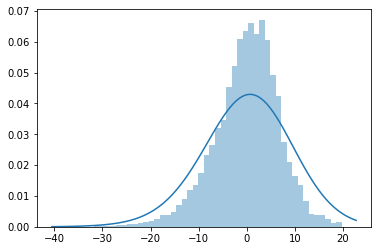

In [52]:
sns.distplot(values,kde_kws={'bw':1})

In [57]:
from sklearn.metrics import mean_absolute_error
mean=values.mean()
mean_absolute_error([mean for _ in range(values.size)],values)

5.207785235704324

In [61]:
from scipy.stats import normaltest

k2,p = normaltest(values)
p

0.0

In [142]:
values = np.sort(values)
x = values[np.where(values == np.percentile(values,5))[0][0]:np.where(values == np.percentile(values,95))[0][0]]

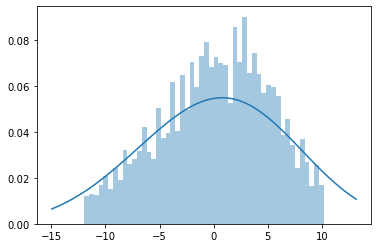

In [143]:
sns.distplot(x,kde_kws={'bw':1})

In [144]:
mean_x = x.mean()
mean_absolute_error([mean_x for _ in range(x.size)],x)

4.147382095664195